In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scr
import pandas as pd
from harmony import harmonize
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.metrics import confusion_matrix



sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [15]:
P28_glut = sc.read_h5ad('P28_dl_glut.h5ad')

In [16]:
P28_glut

AnnData object with n_obs × n_vars = 17710 × 20575
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-P28_dl_1a', 'n_cells-P28_dl_1b', 'n_cells-P28_dl_2a', 'n_cells-P28_dl_2b', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    obsm: 'X_pca', 'X_umap'

# Initial analysis

In [17]:
#del scanorama
del P28_glut.obsp
del P28_glut.varm
del P28_glut.obsm
del P28_glut.uns
for i in ['n_cells-P28_dl_1a', 'n_cells-P28_dl_1b', 'n_cells-P28_dl_2a', 'n_cells-P28_dl_2b', 
          'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std']: del P28_glut.var[i]
P28_glut

AnnData object with n_obs × n_vars = 17710 × 20575
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample'
    var: 'gene_ids', 'feature_types'

In [18]:
P28_glut.X = P28_glut.raw.X.A
sc.pp.highly_variable_genes(P28_glut, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(P28_glut, max_value=10) #scale
sc.tl.pca(P28_glut, svd_solver='arpack') #run PCA

Z = harmonize(P28_glut.obsm['X_pca'], P28_glut.obs, batch_key = 'sample')
P28_glut.obsm['X_harmony'] = Z

sc.pp.neighbors(P28_glut, n_neighbors=25, use_rep='X_harmony')

#sc.pp.neighbors(P28_glut, n_neighbors=25)
#bbknn(P28_glut, batch_key='sample',neighbors_within_batch =6 ) #doesn't work
#sc.tl.leiden(P28_glut)
sc.tl.umap(P28_glut)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:03)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).
computing neighbors


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anac

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


In [31]:
#P28_glut = P28_glut[P28_glut.obs['leiden']!='18',:] #re-run clustering after this removal
#P28_glut = P28_glut[P28_glut.obs['leiden']!='16',:] #re-run clustering after this removal
#P28_glut = P28_glut[P28_glut.obs['leiden']!='13',:] #re-run clustering after this removal
P28_glut = P28_glut[P28_glut.obs['leiden']!='14',:] #re-run clustering after this removal



/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


running Leiden clustering


Trying to set attribute `.obs` of view, copying.


    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)


<AxesSubplot:title={'center':'P28 DL: 17052 cells'}, xlabel='UMAP1', ylabel='UMAP2'>

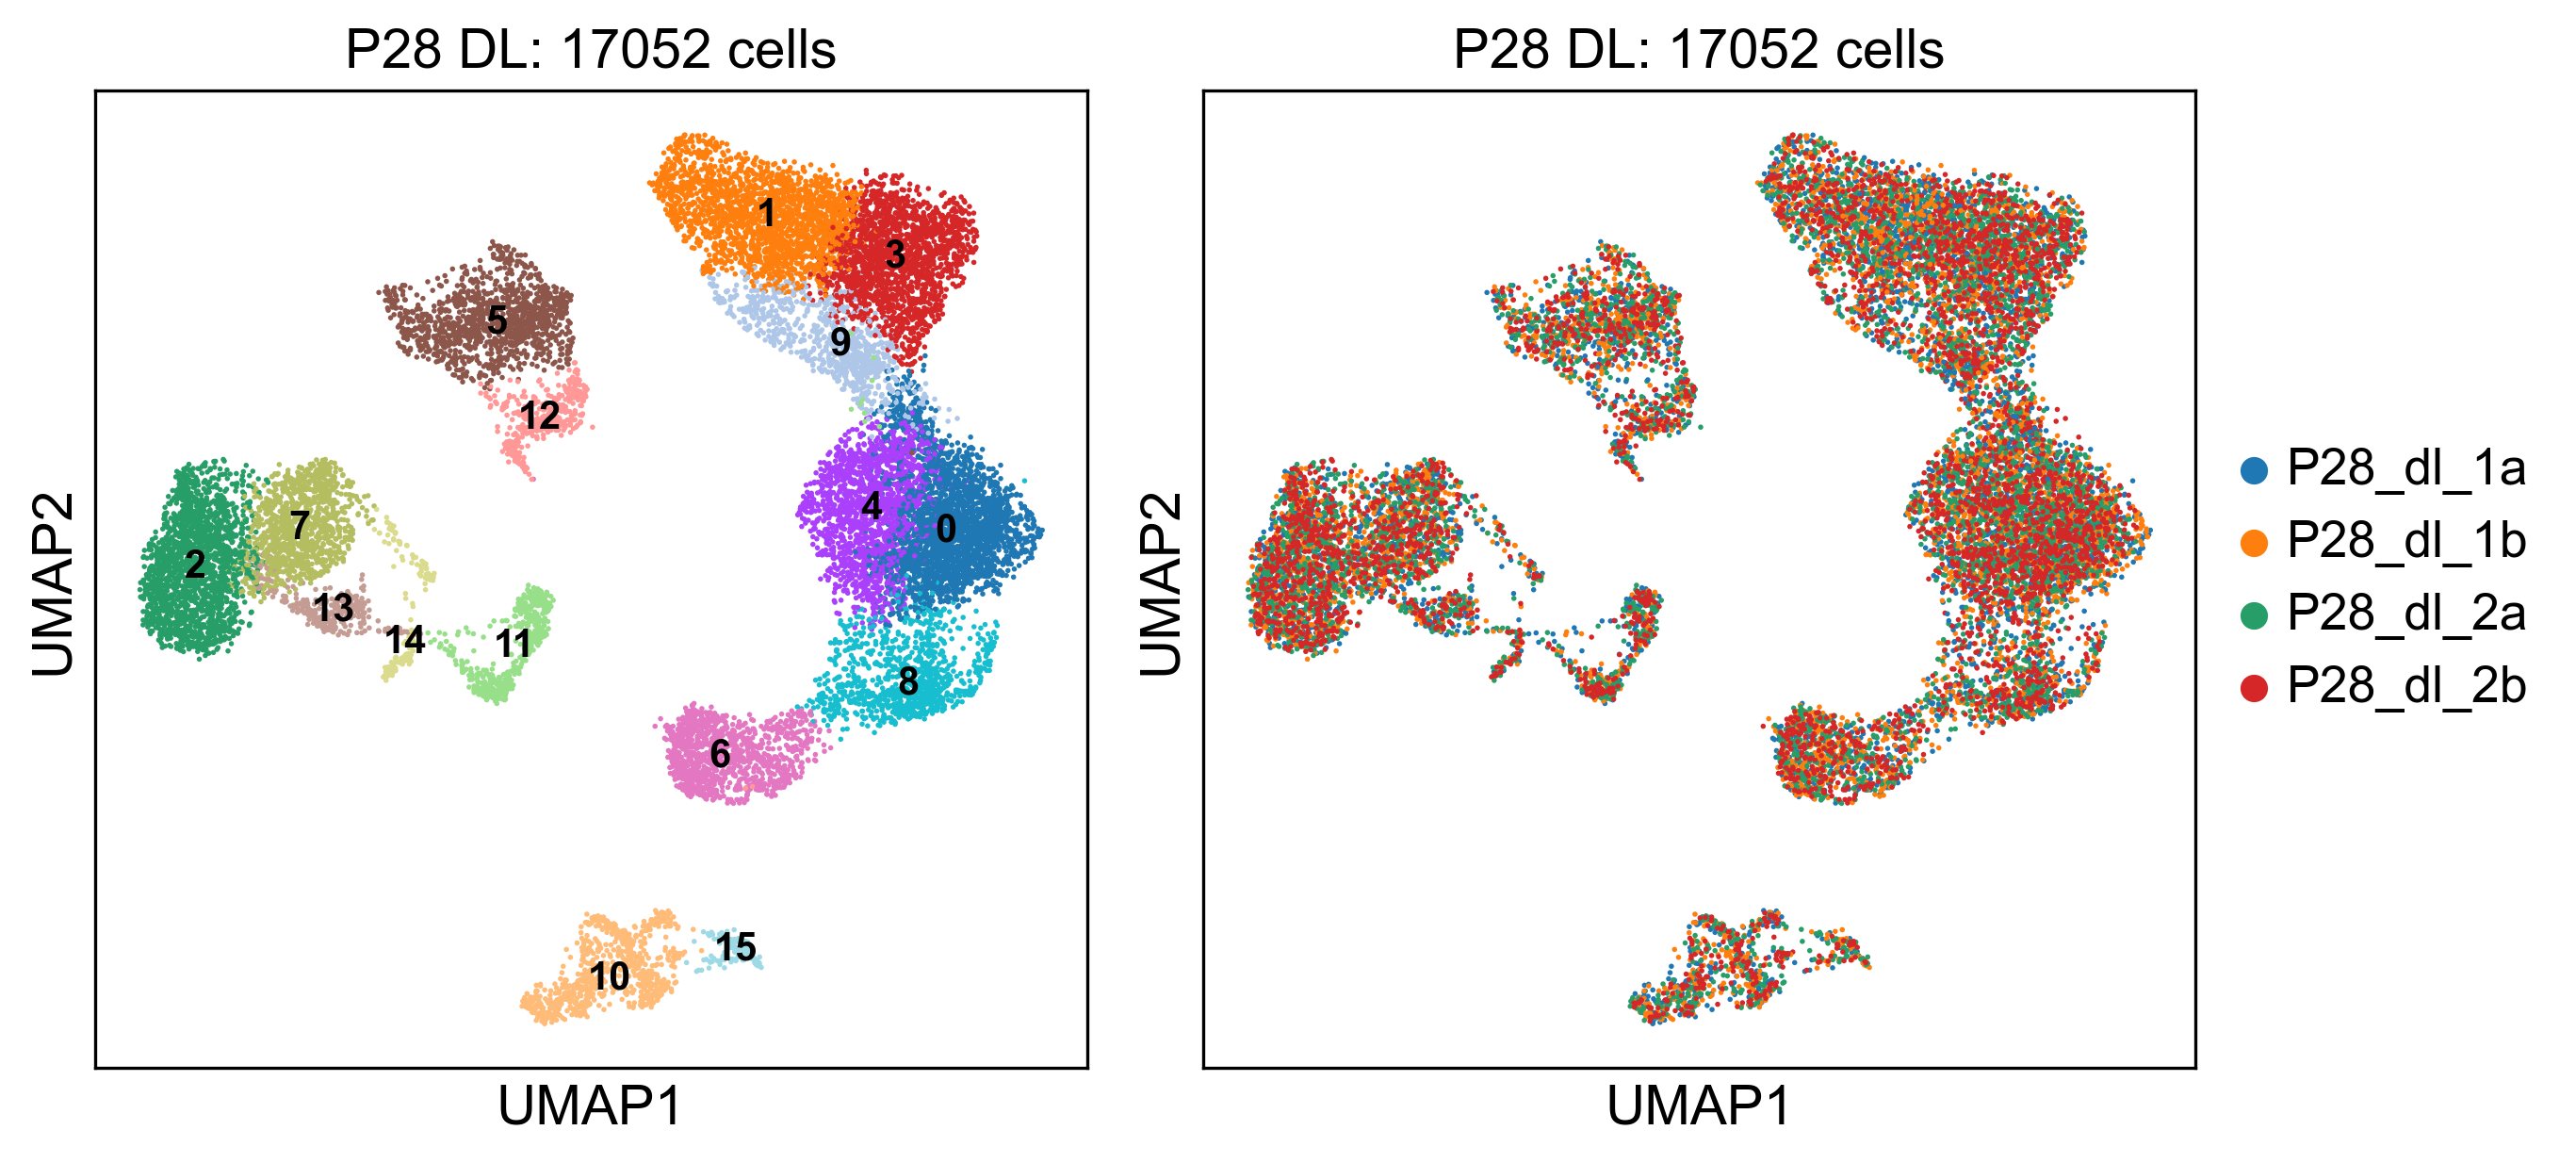

In [32]:
sc.tl.leiden(P28_glut)
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P28_glut, color='leiden', legend_fontsize='10', ax=axs[0], 
           show=False, title='P28 DL: ' + str(P28_glut.shape[0]) + ' cells', frameon=True, legend_loc='on data')
#c.pl.umap(P28_glut, color='leiden', ax=axs[1], show=False, title='P28 DR Leiden: ' + str(P28_glut.uns['leiden']['params']['resolution']) + ' res', legend_loc='on data')
sc.pl.umap(P28_glut, color='sample', ax=axs[1], show=False, title='P28 DL: ' + str(P28_glut.shape[0]) + ' cells')
#sc.pl.umap(P28_glut, color='layer', ax=axs[3], show=False, title='P28 DR: ' + str(P28_glut.shape[0]) + ' cells')

Storing dendrogram info using `.uns["dendrogram_['leiden']"]`


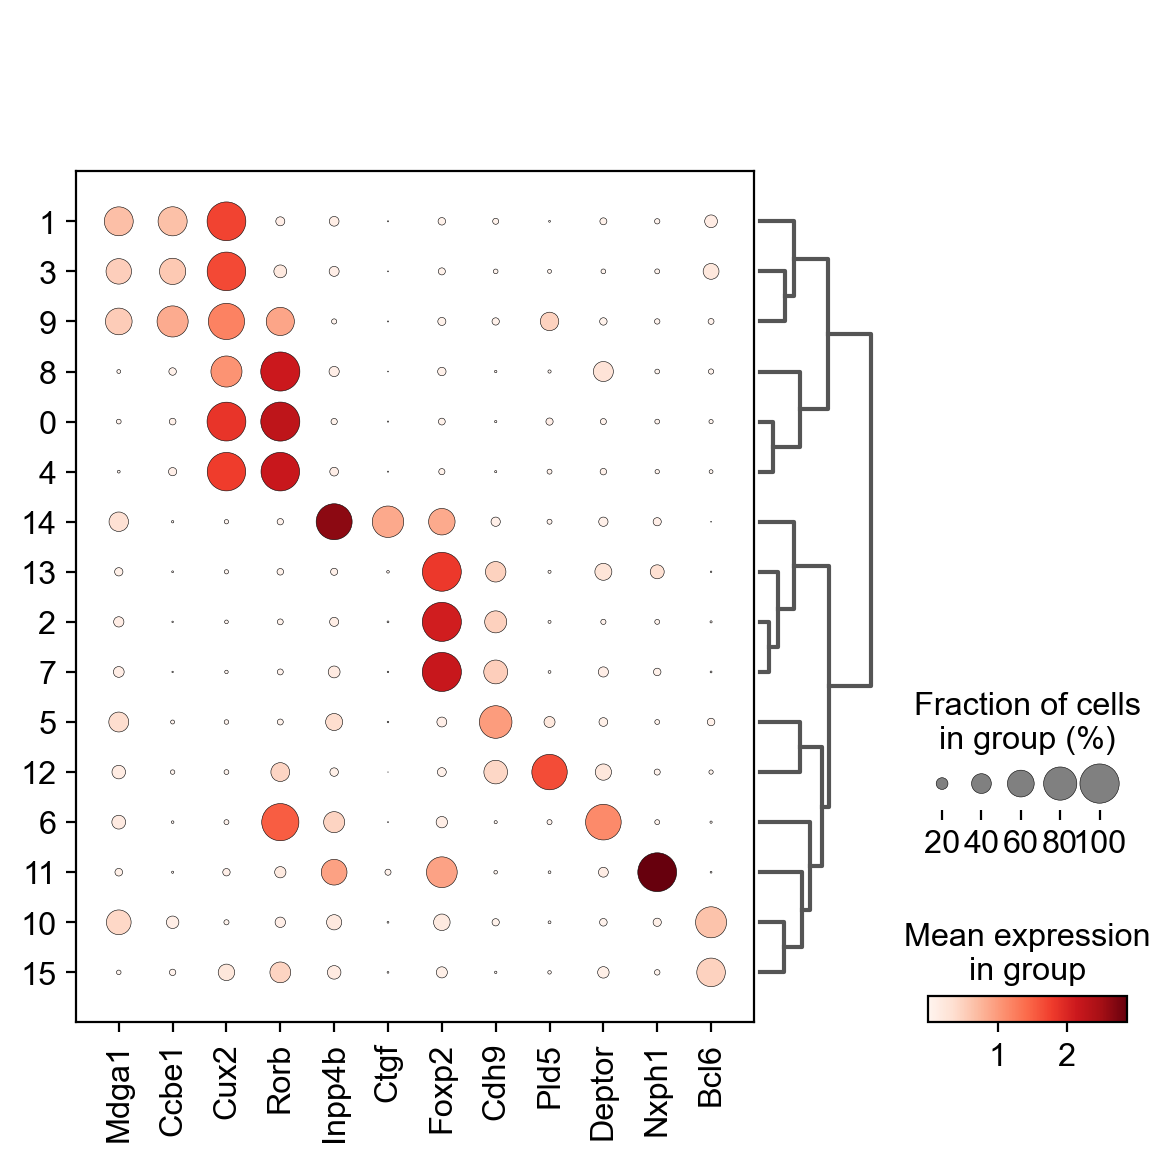

In [46]:
bias_markers = ['Mdga1', 'Ccbe1', 'Cux2',  'Rorb',
                'Inpp4b', 'Ctgf', 'Foxp2',
                'Cdh9', 'Pld5',  'Deptor', 'Nxph1', 'Bcl6' ]
sc.tl.dendrogram(P28_glut, groupby='leiden', use_rep='X_harmony')
sc.pl.dotplot(P28_glut, bias_markers, groupby='leiden', dendrogram=True)

# Name clusters

In [34]:
P28_glut.obs.leiden.values.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15'],
      dtype='object')

In [50]:
Type = ['L4_1',
        'L2/3_1', 'L6CT_B', 'L2/3_2', 
        'L4_2', 'L6IT_A', 'L5IT', 
       'L6CT_C', 'L4_C', 'L2/3_3', 
       'L5PT_A', 'L5NP', 'L6IT_B', 
       'L6CT_A', 'L6b', 'L5PT_B'] 

P28_glut.obs['Type'] = P28_glut.obs['leiden']
a = P28_glut.obs['Type']
P28_glut.obs['Type'] = a.cat.rename_categories(Type).values
#adata.rename_categories(key='cluster', categories=[cluster])

<AxesSubplot:title={'center':'P28 DL: 17052 cells'}, xlabel='UMAP1', ylabel='UMAP2'>

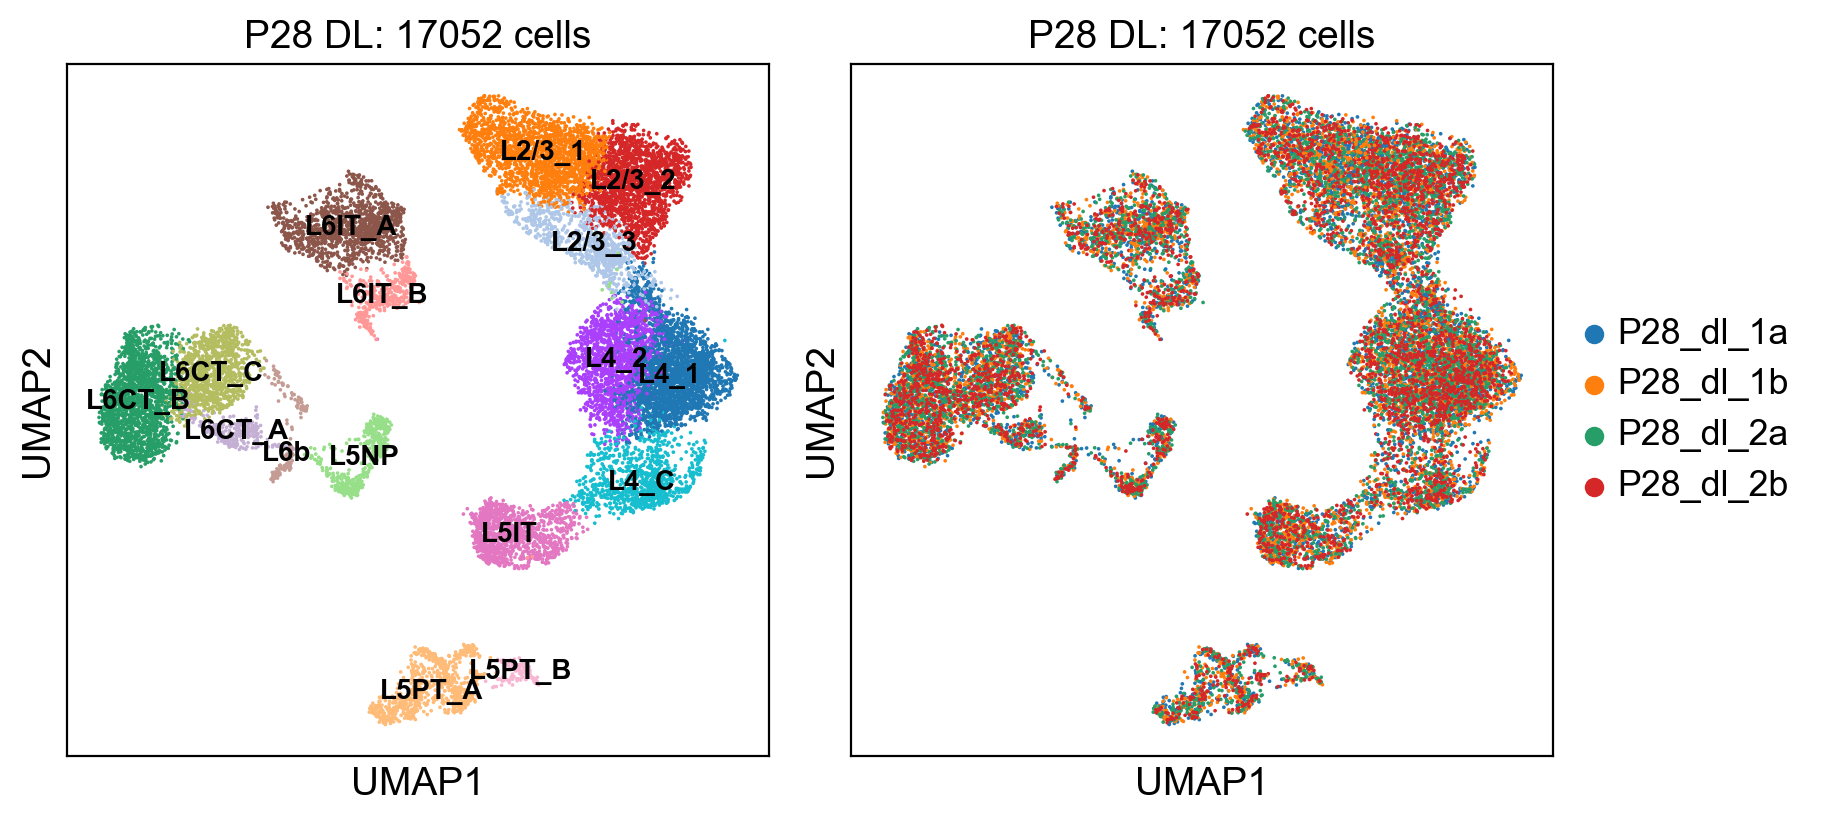

In [51]:
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P28_glut, color='Type', legend_fontsize='10', ax=axs[0], 
           show=False, title='P28 DL: ' + str(P28_glut.shape[0]) + ' cells', frameon=True, legend_loc='on data')
#c.pl.umap(P28_glut, color='leiden', ax=axs[1], show=False, title='P28 DR Leiden: ' + str(P28_glut.uns['leiden']['params']['resolution']) + ' res', legend_loc='on data')
sc.pl.umap(P28_glut, color='sample', ax=axs[1], show=False, title='P28 DL: ' + str(P28_glut.shape[0]) + ' cells')
#sc.pl.umap(P28_glut, color='layer', ax=axs[3], show=False, title='P28 DR: ' + str(P28_glut.shape[0]) + ' cells')

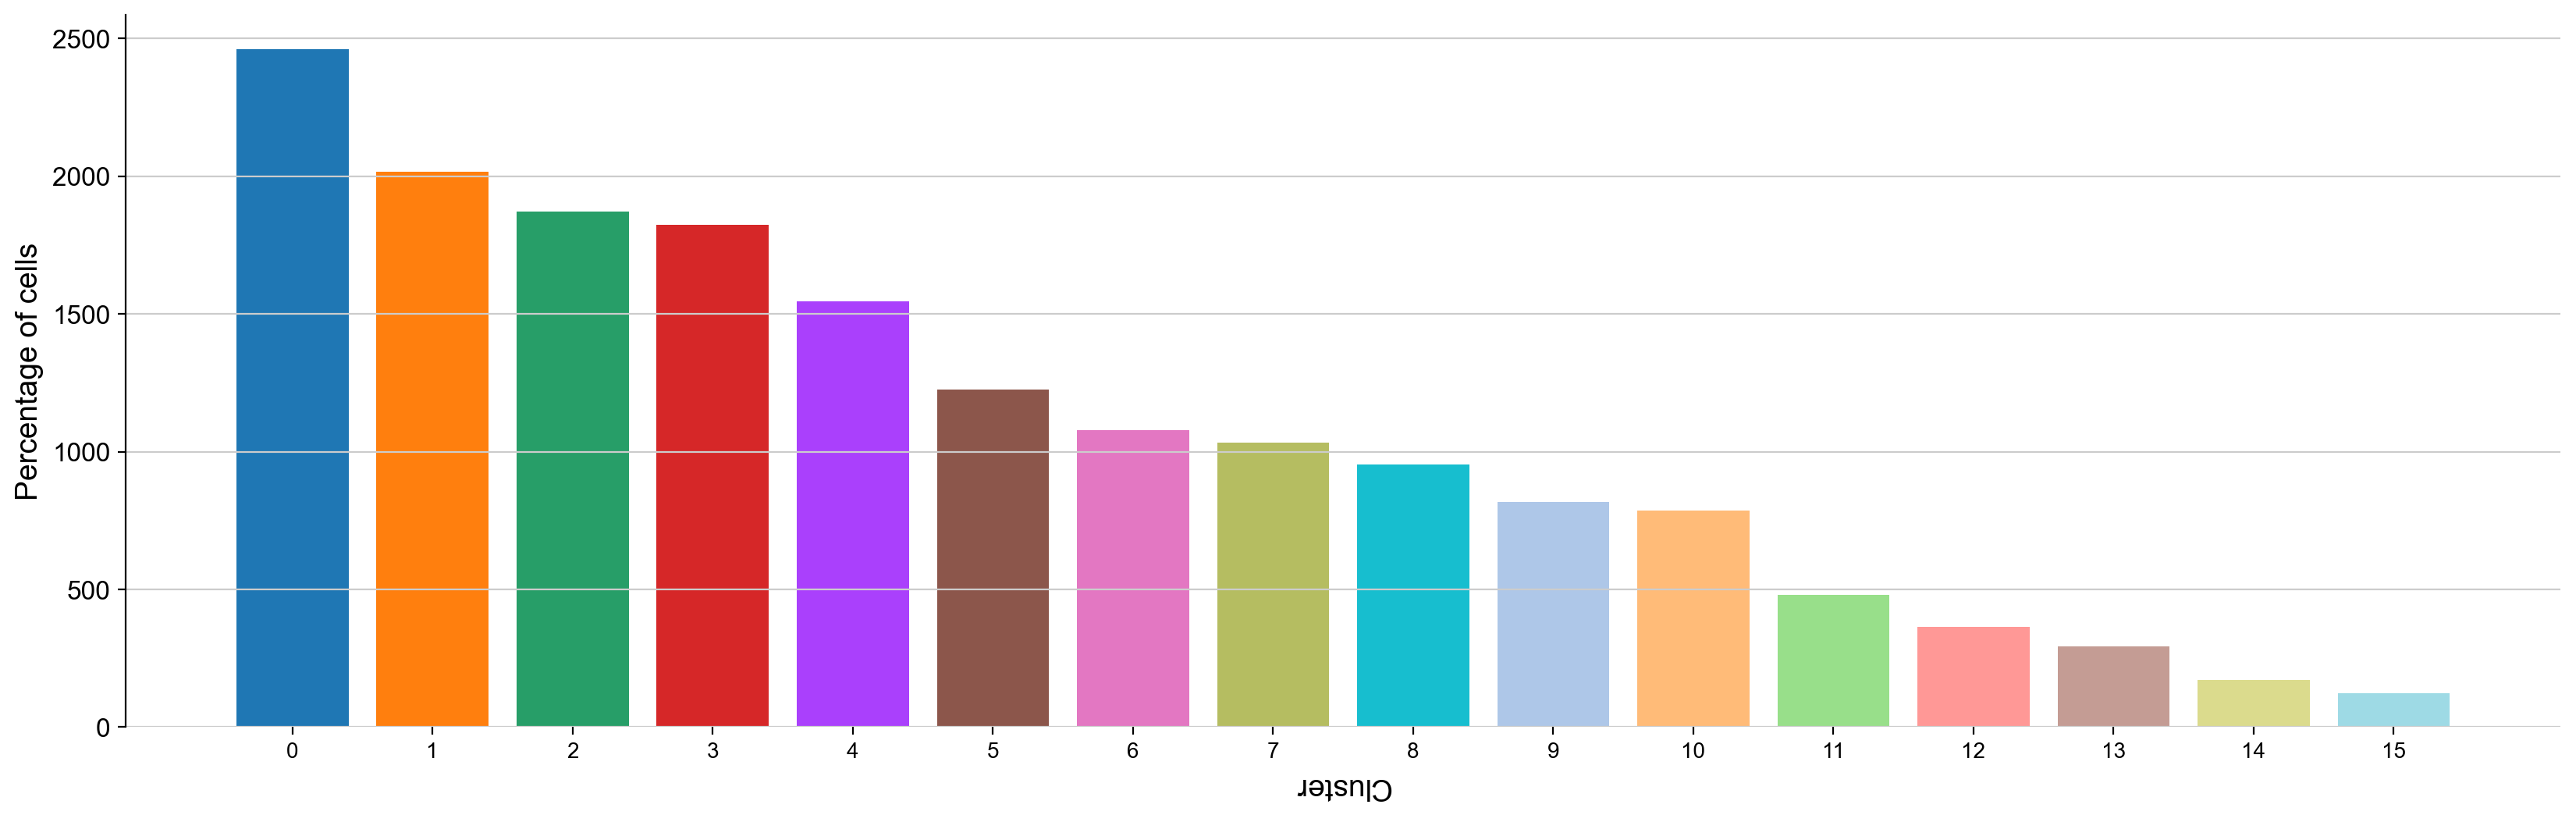

In [52]:
#code
x_pos = list(P28_glut.obs.leiden.values.categories)

total_cells = P28_glut.shape[0]
cell_fraction = []
cell_count = []

for i in x_pos:
    #cell_fraction.append(P28_dr[P28_dr.obs.leiden==i, :].shape[0]*100/total_cells)
    cell_fraction.append(P28_glut[P28_glut.obs.leiden==i, :].shape[0])
    cell_count.append(P28_glut[P28_glut.obs.leiden==i, :].shape[0])


fig, ax = plt.subplots(figsize=(20,6))

right_side = ax.spines["right"]
top = ax.spines["top"]
bottom = ax.spines["bottom"]

right_side.set_visible(False)
top.set_visible(False)
bottom.set_visible(False)


plt.bar(x_pos, cell_fraction, color = P28_glut.uns['leiden_colors'])
plt.grid(axis='x')
plt.xticks(rotation='0', fontsize='10')
plt.yticks(fontsize ='12')

plt.xlabel('Cluster', rotation='180')
plt.ylabel('Percentage of cells')

#plt.yticks(np.linspace(0, 1500, 11))
plt.show()

# Read

## P28_DL is missing L6IT_B

In [3]:
P28_glut = sc.read_h5ad('P28_glut_dl_harmony_120120.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['Type']"]`


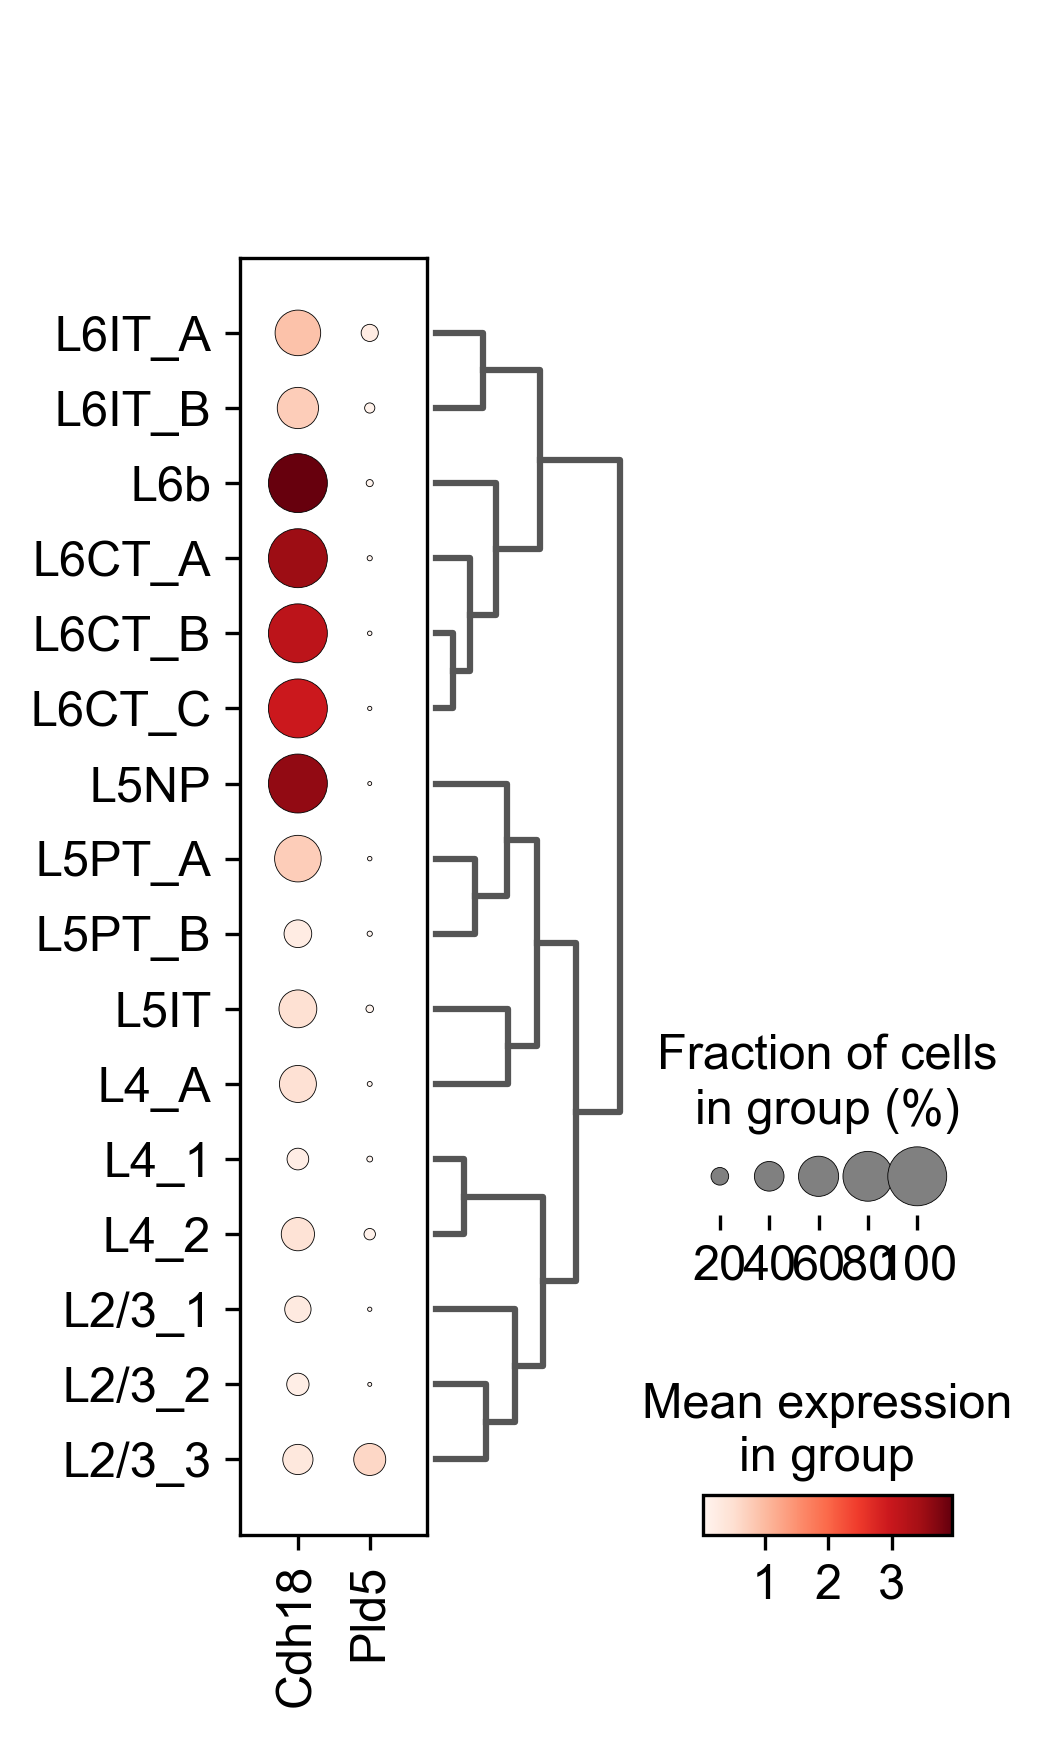

In [5]:
sc.pl.dotplot(P28_glut, ['Cdh18','Pld5'], groupby='Type', dendrogram=True)

In [6]:
P28_glut = sc.read_h5ad('P28_glut_12012020.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['Type']"]`


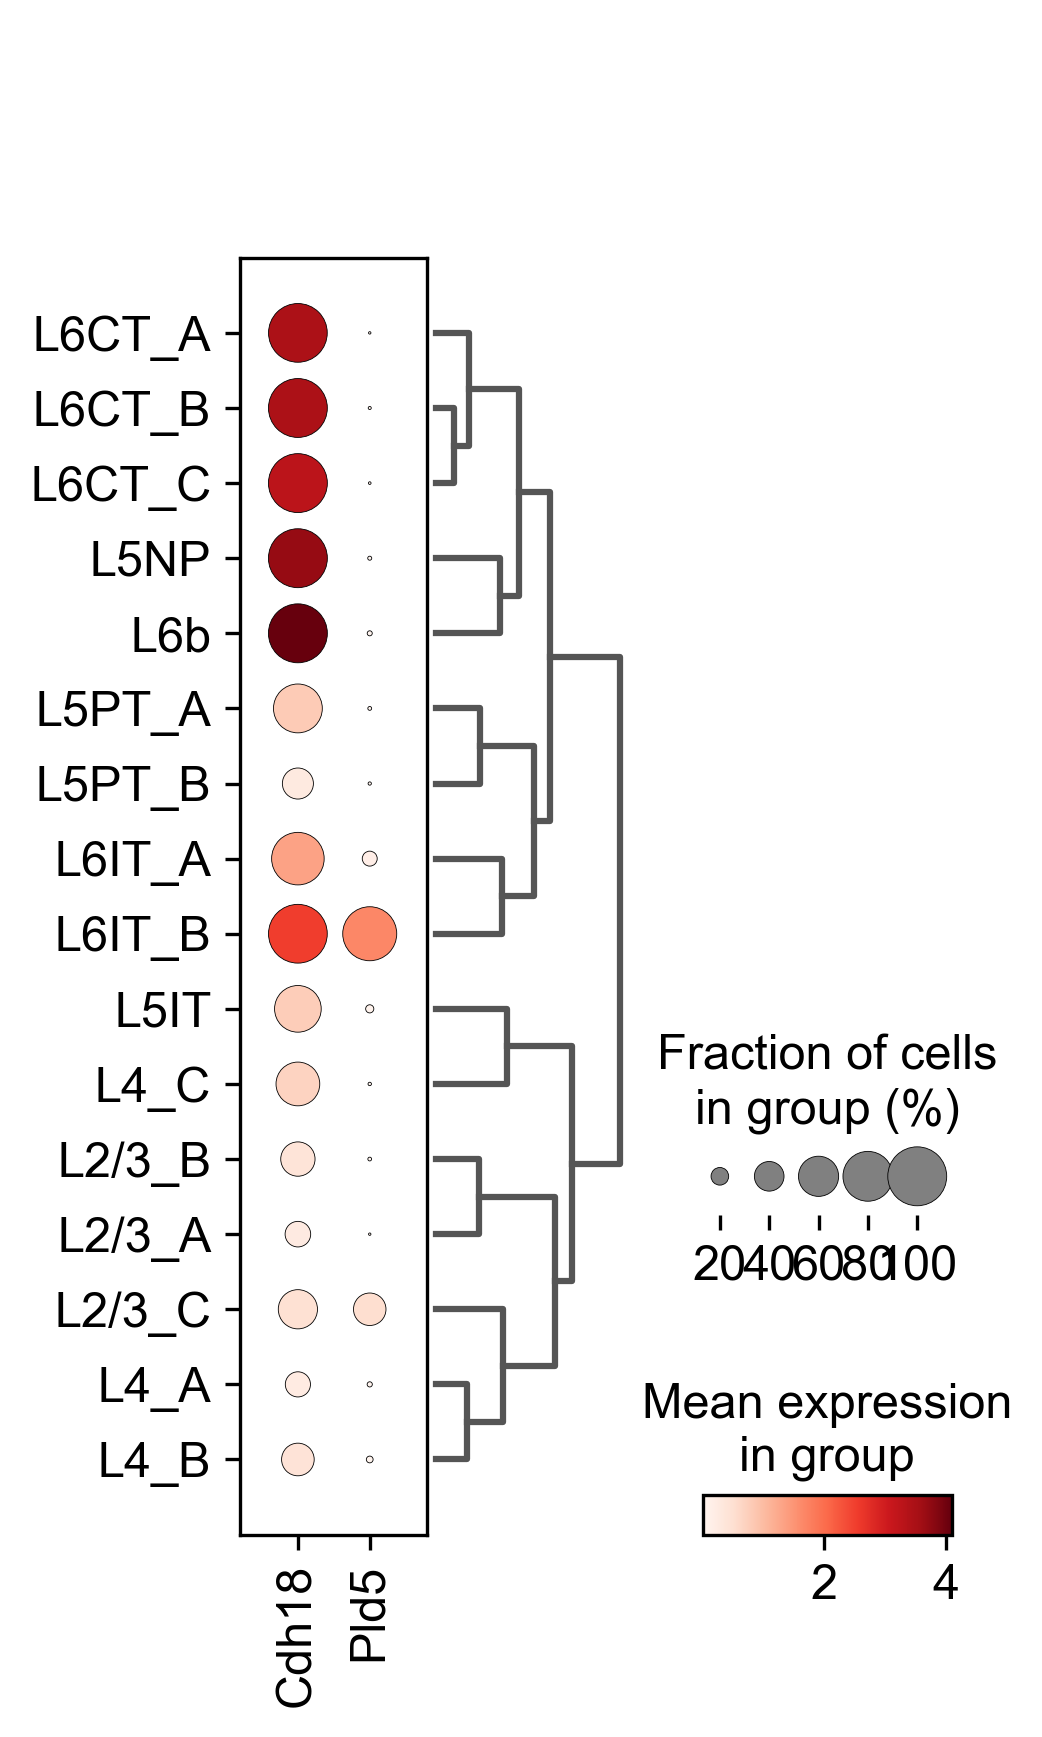

In [7]:
sc.pl.dotplot(P28_glut, ['Cdh18','Pld5'], groupby='Type', dendrogram=True)

# Name subclasses

In [3]:
P28_glut = sc.read_h5ad('P28_glut_dl_harmony_022021.h5ad')

In [5]:
P28_glut.obs['Subclass'] = P28_glut.obs['Type']
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_1','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_2','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_3','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_A','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_AB','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_B','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('B','')
P28_glut.obs['Subclass'] = P28_glut.obs['Subclass'].str.replace('_C','')

# Write

In [8]:
#P28_glut.write_h5ad('P28_glut_dl_analyzed.h5ad')

P28_glut.write_h5ad('P28_glut_dl_harmony_022021.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Subclass' as categorical
